In [1]:

import duckdb
import string
import random
import timeit
import timeit
import seaborn as sns
import pandas as pd

In [2]:

def random_yes_no():
    return random.choice(["yes", "no"])


def generate_random_string(length):
    letters = string.ascii_lowercase
    random_string = ''.join(random.choice(letters) for i in range(length))
    return random_string


def random_int(min, max):
    return random.randint(min, max)


def create_data_frame(rows, cols):
    data = [[generate_random_string(3) for _ in range(cols)] for _ in range(rows)]
    df = pd.DataFrame(data)
    return df


def create_file(dataframe):
    con = duckdb.connect(database=':memory:')
    con.execute("INSTALL spatial;")
    con.execute("LOAD spatial;")
    con.register('df', dataframe)
    con.execute('CREATE TABLE tbl AS SELECT * FROM df')
    con.execute("COPY (SELECT * FROM tbl) TO 'file.xlsx' WITH (FORMAT GDAL, DRIVER 'xlsx');")
    con.close()
    print("Written File!")


def test_file(filename):
    duckdb.sql("INSTALL spatial;")
    duckdb.sql("LOAD spatial;")

    def exec():
        sql_command = f"SELECT * FROM st_read('{filename}');"
        duckdb.sql(sql_command)

    execution_time = timeit.timeit(exec, number=1)
    return execution_time


def test_file_sheetreader(filename,threads=4):
    d = duckdb.connect(config={"allow_unsigned_extensions": "true"})
    d.install_extension("./sheetreader.duckdb_extension",
                        force_install=True)
    d.load_extension("sheetreader")

    def exec():
        d.sql(f"from sheetreader('{filename}', threads={threads})")

    execution_time = timeit.timeit(exec, number=1)
    d.close()
    return execution_time



In [3]:
results = pd.DataFrame(columns=['rows', 'time', 'extension'])

In [4]:

rows = 1000000
i = 1
cols = 4
for i in range(1, 15):
    rows = 100000 * i
    df = create_data_frame(rows, cols)
    create_file(df)
    print("Testing file with " + str(rows) + " rows")
    results.loc[i*3] = [str(rows),  test_file_sheetreader("./file.xlsx",1), "sheetreader 1 thread"]
    results.loc[i*3+2] = [str(rows),  test_file_sheetreader("./file.xlsx",4), "sheetreader 4 threads"]
    results.loc[i*3+1] = [str(rows),  test_file("./file.xlsx"), "spatial"]
        

Written File!
Testing file with 100000 rows


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Written File!
Testing file with 200000 rows


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Written File!
Testing file with 300000 rows


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Written File!
Testing file with 400000 rows


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Written File!
Testing file with 500000 rows


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Written File!
Testing file with 600000 rows


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Written File!
Testing file with 700000 rows


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Written File!
Testing file with 800000 rows


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Written File!
Testing file with 900000 rows


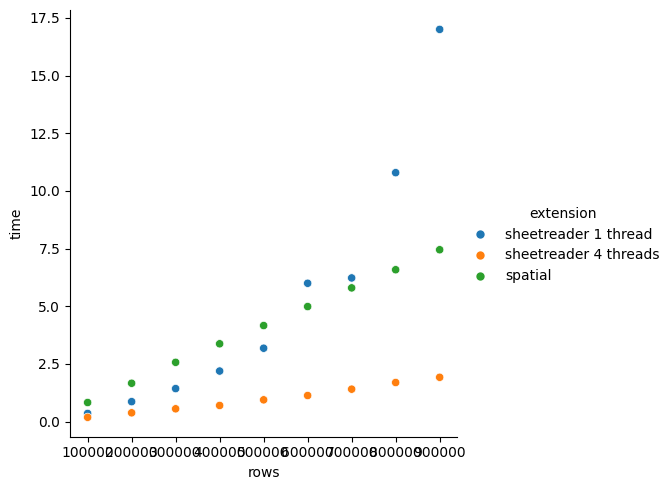

In [5]:
sns.relplot(data=results, x='rows', y='time', hue='extension')